In [1]:
from bayes_opt import BayesianOptimization
from LC_opt_defs import Spec

In [2]:
starts = [0.1, 100, 10000]
ends = [10, 1000, 1000000]
limits = [0.01, 0.7, 0.01]
directions = ["stop", "pass", "stop"]
spec = Spec(starts, ends, limits, directions, margin=0.2, n=1000)

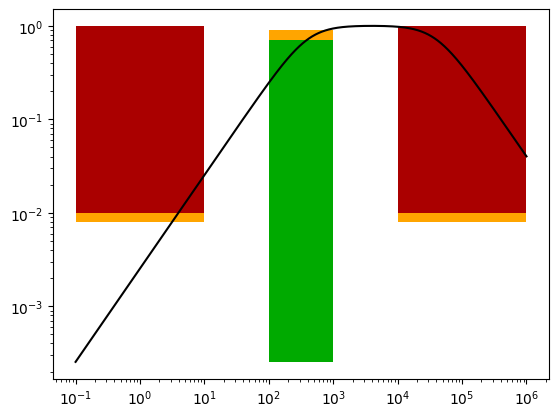

-22.193538682865487

In [3]:
spec.cost(plot=True, par11=1e-4, ser11=1e-2)

In [4]:
pbounds = {'par11': (1e-6, 10e-4), 'ser11': (1e-4, 1e-2), 'par31': (-0.1e-3, 0.0)}

optimizer = BayesianOptimization(
    f=spec.cost,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer.maximize(
    init_points=4,
    n_iter=10,
)

print(optimizer.max)

|   iter    |  target   |   par11   |   par31   |   ser11   |
-------------------------------------------------------------
| 1         | -25.19    | 0.0004176 | -2.797e-0 | 0.0001011 |
| 2         | -14.56    | 0.000303  | -8.532e-0 | 0.001014  |
| 3         | -16.46    | 0.0001871 | -6.544e-0 | 0.004028  |
| 4         | -7.606    | 0.0005393 | -5.808e-0 | 0.006884  |
| 5         | -7.726    | 0.0005291 | -7.466e-0 | 0.006879  |
| 6         | -4.43     | 0.001     | 0.0       | 0.007768  |
| 7         | -49.63    | 1e-06     | 0.0       | 0.008598  |
| 8         | -4.585    | 0.001     | 0.0       | 0.005871  |
| 9         | -49.61    | 1e-06     | 0.0       | 0.005605  |
| 10        | -4.569    | 0.0009894 | -7.159e-0 | 0.006431  |
| 11        | -13.78    | 0.0002681 | -0.0001   | 0.002427  |
| 12        | -5.147    | 0.001     | 0.0       | 0.003248  |
| 13        | -6.105    | 0.001     | 0.0       | 0.001844  |
| 14        | -4.34     | 0.001     | -0.0001   | 0.01      |
{'target

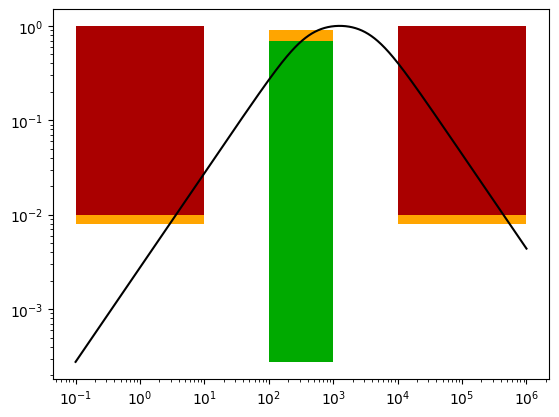

-4.339562420479689

In [5]:
spec.cost(plot=True, par11=optimizer.max['params']['par11'], ser11=optimizer.max['params']['ser11'], par31=optimizer.max['params']['par31'])